In [49]:
import numpy as np
import cv2
import os

import matplotlib.pyplot as plt
%matplotlib inline

###  Define handy functions

**Useful vis function**

In [50]:
def show_image(img):
    fig, ax = plt.subplots(figsize=(10, 10))
    _ = ax.axis('off')
    _ = ax.imshow(img)
    plt.show()

**Affine transform itself**

In [51]:
def affine_transform(x, y):
    
    # get new variables
    x = np.vstack((x.T, np.ones((1, 3))))
    y = np.vstack((y.T, np.ones((1, 3))))
    
    # compute transformation matrix
    matrix = np.dot(y, np.linalg.inv(x))
    
    return matrix[:2]


**Projective transform itself**

In [52]:
def projective_transform(x, y):
    
    # number of correspondent points
    shape = x.shape[0]
    
    # initialize matrix 8x9 for solving linear system
    a = np.zeros((2*shape, 9))
    
    # get matrix 
    for i in range(shape):
        a[2*i] = [-x[i][0], -x[i][1], -1, 0, 0, 0, x[i][0]*y[i][0], x[i][1]*y[i][0], y[i][0]]
        a[2*i + 1] = [0, 0, 0, -x[i][0], -x[i][1], -1, x[i][0]*y[i][1], x[i][1]*y[i][1], y[i][1]]
    
    # fine eigenvectors
    u, s, v = np.linalg.svd(a, full_matrices=True)
    
    # get projective transformation matrix
    matrix = v[-1].reshape((3, 3))
    matrix = matrix / matrix[2, 2]
    
    return matrix
    


**Get paths**

In [53]:
for root, dir, files in os.walk('./data/transforms/'):
    img_paths = [os.path.join(root, file) for file in files]

**Show images with points for affine transform**

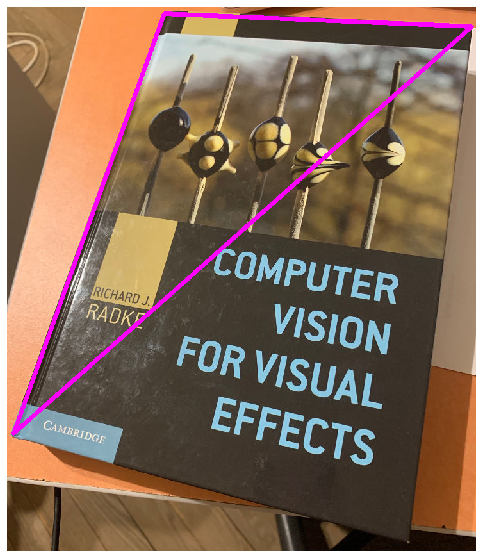

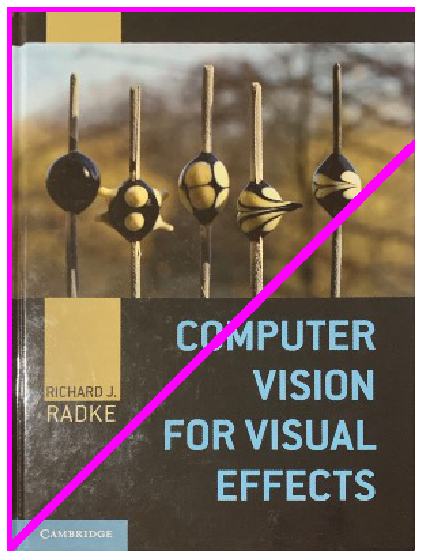

In [55]:
pts1 = np.array([[245, 10], [10, 665], [725, 30]])
pts2 = np.array([[0, 0], [0, 399], [400, 0]])

imgs = []
for img_path in img_paths:
    
    # read image
    img = cv2.imread(img_path)
    
    # get original image in RGB for visualization
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    
    # append img
    imgs.append(img)
    
    if 'flat' not in img_path:
        img_for_vis = cv2.polylines(img.copy(), [pts1], 1, (255, 0, 255), 5)
    else:
        img_for_vis = cv2.polylines(img.copy(), [pts2], 1, (255, 0, 255), 5)
        
    
    # show image
    show_image(img_for_vis)

**Find custom Affine transform**

Matrix from custom affine transform: 
 [[ 8.21059229e-01  2.94578502e-01 -2.04105296e+02]
 [-2.50078345e-02  6.00188029e-01  1.25039173e-01]]


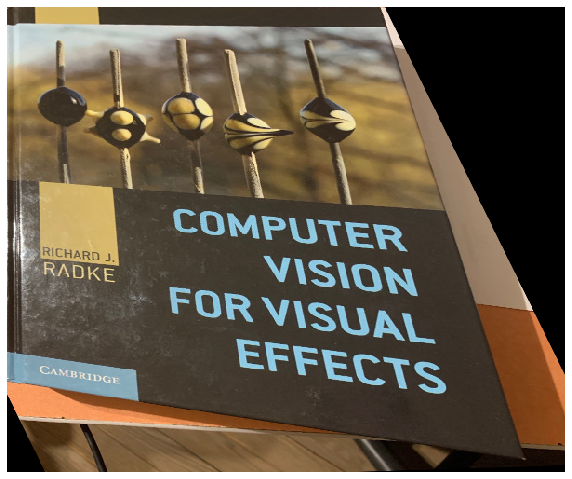

In [65]:
# take img for which we want to do transformation
img = imgs[0]

# get matrix wich will flatten the book
matrix = affine_transform(pts1.astype(np.float32), pts2.astype(np.float32))

print('Matrix from custom affine transform: \n', matrix)

# apply transform
transformed_img = cv2.warpAffine(img, matrix, dsize=(600, 500))

# show image
show_image(transformed_img)

**Use opencv Affine transform**

Matrix from opencv affine transform: 
 [[ 8.21059229e-01  2.94578502e-01 -2.04105296e+02]
 [-2.50078345e-02  6.00188029e-01  1.25039173e-01]]


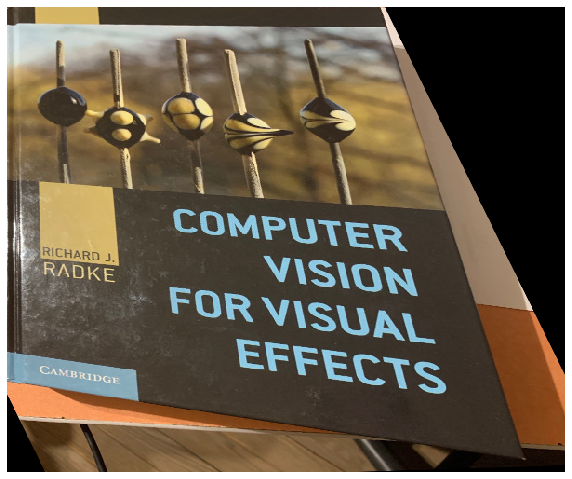

In [66]:
# get matrix wich will flatten the book
matrix = cv2.getAffineTransform(pts1.astype(np.float32), pts2.astype(np.float32))

print('Matrix from opencv affine transform: \n', matrix)

# apply transform
transformed_img = cv2.warpAffine(img, matrix, dsize=(600, 500))

# show image
show_image(transformed_img)

**Show images with points for projective transform**

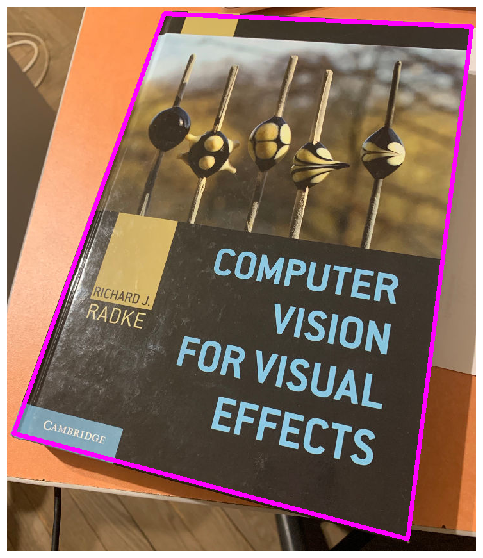

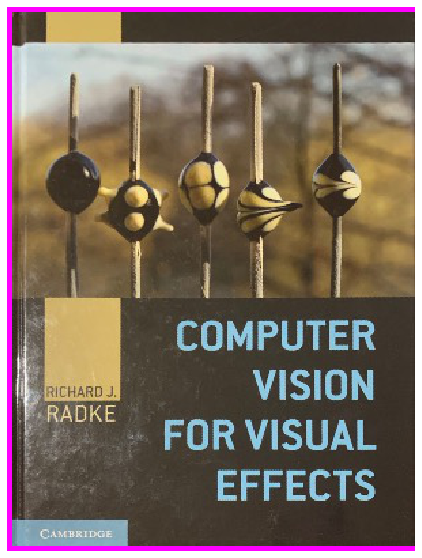

In [67]:
pts1 = np.array([[10, 665], [245, 10], [725, 30], [625, 830]])
pts2 = np.array([[0, 399], [0, 0], [400, 0], [400, 399]])

imgs = []
for img_path in img_paths:
    
    # read image
    img = cv2.imread(img_path)
    
    # get original image in RGB for visualization
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    
    # append img
    imgs.append(img)
    
    if 'flat' not in img_path:
        img_for_vis = cv2.polylines(img.copy(), [pts1], 1, (255, 0, 255), 5)
    else:
        img_for_vis = cv2.polylines(img.copy(), [pts2], 1, (255, 0, 255), 5)
        
    
    # show image
    show_image(img_for_vis)

**Find custom projective transform**

Matrix from custom projective transform: 
 [[ 1.02454265e+00  3.67584005e-01 -2.54688790e+02]
 [-3.57004264e-02  8.56810233e-01  1.78502134e-01]
 [ 3.15425961e-04  6.38218678e-04  1.00000000e+00]]


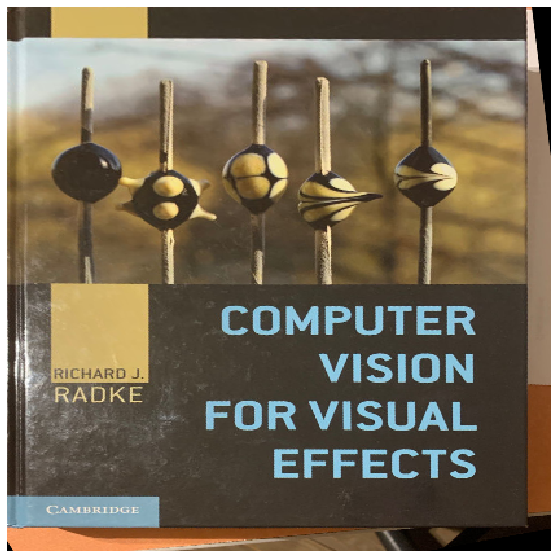

In [68]:
# take img for which we want to do transformation
img = imgs[0]

# get matrix wich will flatten the book
matrix = projective_transform(pts1.astype(np.float32), pts2.astype(np.float32))

print('Matrix from custom projective transform: \n', matrix)

# apply transform
transformed_img = cv2.warpPerspective(img, matrix, dsize=(420, 420))

# show image
show_image(transformed_img)

**Use opencv projective transform**

Matrix from custom projective transform: 
 [[ 1.02454265e+00  3.67584005e-01 -2.54688790e+02]
 [-3.57004264e-02  8.56810233e-01  1.78502132e-01]
 [ 3.15425961e-04  6.38218678e-04  1.00000000e+00]]


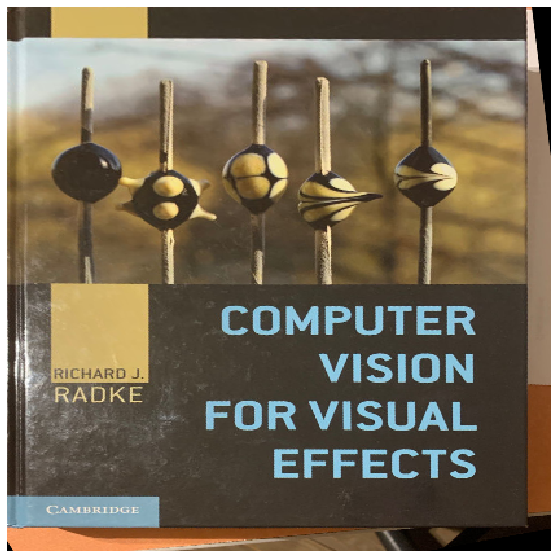

In [69]:
# take img for which we want to do transformation
img = imgs[0]

# get matrix wich will flatten the book
matrix = cv2.getPerspectiveTransform(pts1.astype(np.float32), pts2.astype(np.float32))

print('Matrix from custom projective transform: \n', matrix)

# apply transform
transformed_img = cv2.warpPerspective(img, matrix, dsize=(420, 420))

# show image
show_image(transformed_img)